In [1]:
from sage.all import *
import numpy as np
import Wigner as wg

import matplotlib.pyplot as plt

In [2]:
mubs = np.load('MUBS/3-3-desarguesian.npy')
mubsk = np.load('MUBS/3-3-albert.npy')

In [3]:
F = GF(3**3, 'a'); a = F.gen()
F

Finite Field in a of size 3^3

In [4]:
FF = [F(0)] + [a**j for j in range(26)]
FF

[0,
 1,
 a,
 a^2,
 a + 2,
 a^2 + 2*a,
 2*a^2 + a + 2,
 a^2 + a + 1,
 a^2 + 2*a + 2,
 2*a^2 + 2,
 a + 1,
 a^2 + a,
 a^2 + a + 2,
 a^2 + 2,
 2,
 2*a,
 2*a^2,
 2*a + 1,
 2*a^2 + a,
 a^2 + 2*a + 1,
 2*a^2 + 2*a + 2,
 2*a^2 + a + 1,
 a^2 + 1,
 2*a + 2,
 2*a^2 + 2*a,
 2*a^2 + 2*a + 1,
 2*a^2 + 1]

In [5]:
wootters = wg.Wigner(FF, mubs)
kantor   = wg.Wigner(FF, mubsk, op='albert')

In [6]:
raysW = wootters.Spread()
raysK = kantor.Spread()

In [7]:
def SymplecticForm(alpha, beta):
    a, b = alpha
    c, d = beta
    return (a*d - b*c).trace()

In [8]:
def checkSpread(lines):
    for k in range(len(lines)):
        for alpha in lines[k]:
            for beta in lines[k]:
                s = SymplecticForm(alpha, beta)
                if s != 0:
                    print('Not totally isotropic!')
                    print(alpha, beta)
                    print(s)
                    break
        print('Ray {} is totally isotropic!'.format(k))

In [9]:
checkSpread(raysW)

Ray 0 is totally isotropic!
Ray 1 is totally isotropic!
Ray 2 is totally isotropic!
Ray 3 is totally isotropic!
Ray 4 is totally isotropic!
Ray 5 is totally isotropic!
Ray 6 is totally isotropic!
Ray 7 is totally isotropic!
Ray 8 is totally isotropic!
Ray 9 is totally isotropic!
Ray 10 is totally isotropic!
Ray 11 is totally isotropic!
Ray 12 is totally isotropic!
Ray 13 is totally isotropic!
Ray 14 is totally isotropic!
Ray 15 is totally isotropic!
Ray 16 is totally isotropic!
Ray 17 is totally isotropic!
Ray 18 is totally isotropic!
Ray 19 is totally isotropic!
Ray 20 is totally isotropic!
Ray 21 is totally isotropic!
Ray 22 is totally isotropic!
Ray 23 is totally isotropic!
Ray 24 is totally isotropic!
Ray 25 is totally isotropic!
Ray 26 is totally isotropic!
Ray 27 is totally isotropic!


In [10]:
checkSpread(raysK)

Ray 0 is totally isotropic!
Ray 1 is totally isotropic!
Ray 2 is totally isotropic!
Ray 3 is totally isotropic!
Ray 4 is totally isotropic!
Ray 5 is totally isotropic!
Ray 6 is totally isotropic!
Ray 7 is totally isotropic!
Ray 8 is totally isotropic!
Ray 9 is totally isotropic!
Ray 10 is totally isotropic!
Ray 11 is totally isotropic!
Ray 12 is totally isotropic!
Ray 13 is totally isotropic!
Ray 14 is totally isotropic!
Ray 15 is totally isotropic!
Ray 16 is totally isotropic!
Ray 17 is totally isotropic!
Ray 18 is totally isotropic!
Ray 19 is totally isotropic!
Ray 20 is totally isotropic!
Ray 21 is totally isotropic!
Ray 22 is totally isotropic!
Ray 23 is totally isotropic!
Ray 24 is totally isotropic!
Ray 25 is totally isotropic!
Ray 26 is totally isotropic!
Ray 27 is totally isotropic!


In [11]:
raysW == raysK

False

In [15]:
def checkPartition(rays):
    for i, ray in enumerate(rays):
        for j, cmp in enumerate(rays):
            if i == j:
                continue
            if len(set(raysW[0]) & set(raysW[1])) > 1:
                print(i, j)
                raise Exception('Intersection is not trivial!')
    return true

In [16]:
checkPartition(raysW)

True

In [17]:
checkPartition(raysK)

True

In [18]:
def proj(v):
    d = len(v)
    v = v.reshape((d,1))
    return np.kron(v, v.conj().T)

Checking whole sets of MUBs.

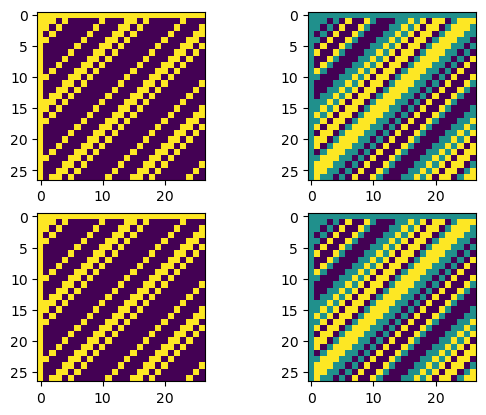

In [25]:
k = 1
fig, axs = plt.subplots(2,2)
axs[0][0].imshow(np.real(mubs[27*k:27*(k+1)]))
axs[0][1].imshow(np.imag(mubs[27*k:27*(k+1)]))
# axs[0][2].imshow(np.abs(mubs[27*k:27*(k+1)]))
axs[1][0].imshow(np.real(mubsk[27*k:27*(k+1)]))
axs[1][1].imshow(np.imag(mubsk[27*k:27*(k+1)]))
# axs[1][2].imshow(np.abs(mubsk[27*k:27*(k+1)]))

Checking individual vectors from each set.

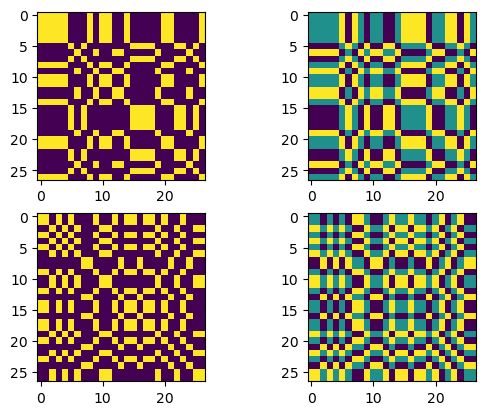

In [35]:
k = 2
j = 10
fig, axs = plt.subplots(2,2)
axs[0][0].imshow(np.real(proj(mubs[27*k:27*(k+1), j])))
axs[0][1].imshow(np.imag(proj(mubs[27*k:27*(k+1), j])))
axs[1][0].imshow(np.real(proj(mubsk[27*k:27*(k+1), j])))
axs[1][1].imshow(np.imag(proj(mubsk[27*k:27*(k+1), j])))

So the MUBs are not equivalent in the sense that there is not a unitary transformation $U$ such that $\mathcal B^{\mathcal K} = U \mathcal B U^\dagger$. But what about permutations?

In [36]:
mubs_list  = [mubs[27*k:27*(k+1)] for k in range(28)]
mubsk_list = [mubsk[27*k:27*(k+1)] for k in range(28)]

In [44]:
for i, B1 in enumerate(mubs_list):
    for j, B2 in enumerate(mubsk_list):
        if np.all(np.isclose(B1, B2, rtol=1e-5)):
            print('Match: {} and {}'.format(i, j))

Match: 0 and 0
Match: 1 and 1


Other than the horizontal and vertical lines, no two sets of vectors are the same with respect to the matrix they form. So no permutations of the full matrices, but, we still cannot exclude the possibility that there are permutations in the vectors themselves.

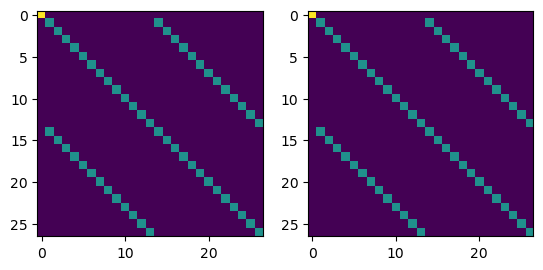

In [17]:
j = 0
m = 28
Aw = np.zeros((27,27), dtype='complex64')
Ak = np.zeros((27,27), dtype='complex64')
for k in range(m):
    Aw += proj(mubs[27*k:27*(k+1), j])
    Ak += proj(mubs_kantor[27*k:27*(k+1), j])

fig, (ax1, ax2) = plt.subplots(1,2)
ax1.imshow(np.real(Aw))
ax2.imshow(np.real(Ak))

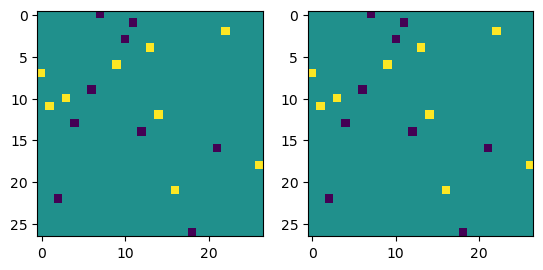

In [114]:
p = (F[20], F[15])
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.imshow(np.imag(wootters.A(*p)))
ax2.imshow(np.imag(kantor.A(*p)))

In [20]:
np.permutation()

[1, 3, 2]